In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation



!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

In [3]:
CLIENT_ID = 'UC0C2HF5D11KUYAO5XR51OJRNE23NSEI3G15WTWCHTPFZ4SV' # my Foursquare ID
CLIENT_SECRET = 'NWU42TKGL2WEHRQ4CQ0KIXJWORUDJ14AHBUMAFDLXZHNJADN' # my Foursquare Secret
ACCESS_TOKEN = '' # my FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UC0C2HF5D11KUYAO5XR51OJRNE23NSEI3G15WTWCHTPFZ4SV
CLIENT_SECRET:NWU42TKGL2WEHRQ4CQ0KIXJWORUDJ14AHBUMAFDLXZHNJADN


In [4]:
#scrape the wikipedia web page to get Borough population data
df = pd.read_html('https://en.wikipedia.org/wiki/Municipalities_of_Milan')[1]
df = df.drop([9])
df['Population(2014)'] = df['Population(2014)'].replace([153.109,156.369],[153109.00,156369.00])

In [6]:
df.head()

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts)
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua..."
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma..."
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra..."
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ..."
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ..."


In [9]:
#show dataframe df
df

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts)
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua..."
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma..."
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra..."
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ..."
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ..."
5,6.0,"Barona, Lorenteggio",18.28,149000.0,8998,"Arzaga, Barona, Boffalora, Cascina Bianca, Con..."
6,7.0,"Baggio, De Angeli, San Siro",31.34,170814.0,6093,"Assiano, Baggio, Figino, Fopponino, Forze Arma..."
7,8.0,"Fiera, Gallaratese, Quarto Oggiaro",23.72,181669.0,8326,"Boldinasco, Bullona, Cagnola, Campo dei Fiori,..."
8,9.0,"Porta Garibaldi, Niguarda",21.12,181598.0,9204,"Affori, Bicocca, Bovisa, Bovisasca, Bruzzano, ..."


In [11]:
#import data from Milan Open Data website with coordinates for each Borough

df2 = pd.read_json('https://dati.comune.milano.it/dataset/a7f54a9a-8331-4825-bc52-6a69a10b0bd3/resource/162ffc23-419f-420d-b14f-bccfe28d920a/download/municipi_sedi__final.json')

df2

,Municipio,Indirizzo,Civico,CAP,Indirizzo Pec,indirizzo mail istituzionale,orari,telefono,Mezzi pubblici,sito web,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,municipio1@pec.comune.milano.it,M.Municipio1@comune.milano.it,n.d.,02 88452689,Metro:linea 1 (rossa) - linea 3 (gialla) - Tra...,,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)"
1,Municipio 2,Viale Zara,100,20125,Municipio2@pec.comune.milano.it,M.Municipio2@comune.milano.it,n.d.,02.884.58223 - 64253,"MM5 Marche/MM3 Zara - Tram 5, 7, 31",,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)"
2,Municipio 3,Via Sansovino,9,20133,Municipio3@pec.comune.milano.it,M.Municipio3@comune.milano.it,n.d.,02 884.58300,"MM 1-2 (Lima,Loreto,Piola) Filobus 90-91-92",,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)"
3,Municipio 4,Via Oglio,18,20139,Municipio4@pec.comune.milano.it,M.Municipio4@comune.milano.it,n.d.,02 884.58400,MM3 Brenta/Corvetto - Bus: 34-65-77-84-95,,35,LODI - CORVETTO,9.217800,45.440367,"(45.4403671711589, 9.21780038417137)"
4,Municipio 5,Viale Tibaldi,41,20136,Municipio5@pec.comune.milano.it,M.Municipio5@comune.milano.it,n.d.,02 884.53533 - 58500,"tram 15 - filobus 90, 91",,6,PORTA TICINESE - CONCA DEL NAVIGLIO,9.183194,45.444604,"(45.444604431264, 9.18319353884224)"
5,Municipio 6,Viale Legioni Romane,54,20147,Municipio6@pec.comune.milano.it,M.Municipio6@comune.milano.it,n.d.,02 884 58636,MM 1 (Primaticcio) - Autobus 58 - 63 - 64,web.comune.milano.it/wps/portal/municipi/munic...,56,FORZE ARMATE,9.127671,45.459587,"(45.4595868109128, 9.12767089895275)"
6,Municipio 7,Via Anselmo da Baggio,55,20153,Municipio7@pec.comune.milano.it,M.Municipio7@comune.milano.it,9:00 - 12:00 e 15:00 - 16:00,02 884 52237 - 45796,Autobus 67,,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,9.088685,45.463432,"(45.4634318317571, 9.08868519510992)"
7,Municipio 8,Via Quarenghi,21,20151,Municipio8@pec.comune.milano.it,M.Municipio8@comune.milano.it,n.d.,02 884.58800,,,65,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,9.115104,45.496472,"(45.496472318274, 9.11510409784692)"
8,Municipio 9,Via Guerzoni,38,20158,Municipio9@pec.comune.milano.it,M.Municipio9@comune.milano.it,n.d.,02 884 58777,MM3 Dergano e/o Maciachini - Autobus 82 - Filo...,,79,DERGANO,9.175739,45.500140,"(45.5001399883657, 9.17573905361164)"


In [19]:
#create a new dataframe df3 by merging df and df2
df3 = pd.concat([df,df2], axis=1)

In [20]:
df3.head()

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts),Municipio,Indirizzo,Civico,CAP,...,indirizzo mail istituzionale,orari,telefono,Mezzi pubblici,sito web,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua...",Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,...,M.Municipio1@comune.milano.it,n.d.,02 88452689,Metro:linea 1 (rossa) - linea 3 (gialla) - Tra...,,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)"
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma...",Municipio 2,Viale Zara,100,20125,...,M.Municipio2@comune.milano.it,n.d.,02.884.58223 - 64253,"MM5 Marche/MM3 Zara - Tram 5, 7, 31",,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)"
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra...",Municipio 3,Via Sansovino,9,20133,...,M.Municipio3@comune.milano.it,n.d.,02 884.58300,"MM 1-2 (Lima,Loreto,Piola) Filobus 90-91-92",,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)"
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ...",Municipio 4,Via Oglio,18,20139,...,M.Municipio4@comune.milano.it,n.d.,02 884.58400,MM3 Brenta/Corvetto - Bus: 34-65-77-84-95,,35,LODI - CORVETTO,9.217800,45.440367,"(45.4403671711589, 9.21780038417137)"
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ...",Municipio 5,Viale Tibaldi,41,20136,...,M.Municipio5@comune.milano.it,n.d.,02 884.53533 - 58500,"tram 15 - filobus 90, 91",,6,PORTA TICINESE - CONCA DEL NAVIGLIO,9.183194,45.444604,"(45.444604431264, 9.18319353884224)"


In [21]:
#drop unnecessary columns
df3 = df3.drop(columns=['indirizzo mail istituzionale','orari','telefono','Mezzi pubblici','sito web','Indirizzo Pec'], axis=1)

In [22]:
df3.head(3)

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts),Municipio,Indirizzo,Civico,CAP,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua...",Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)"
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma...",Municipio 2,Viale Zara,100,20125,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)"
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra...",Municipio 3,Via Sansovino,9,20133,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)"


In [24]:
#show data types using the dtype method
df3.dtypes

Borough                                float64
Name                                    object
Area(km2)                              float64
Population(2014)                       float64
Population density(inhabitants/km2)      int64
Quartieri (districts)                   object
Municipio                               object
Indirizzo                               object
Civico                                   int64
CAP                                      int64
ID_NIL                                   int64
NIL                                     object
LONG_X_4326                            float64
LAT_Y_4326                             float64
Location                                object
dtype: object

## Visualise Milan's Boroughs on a Map

In [25]:
#Find Milan's oordinates
address = 'Milan'

geolocator = Nominatim(user_agent="Milan_Supermarket")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [27]:
# create map of Milan using latitude and longitude 
map_milan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df3['LAT_Y_4326'], df3['LONG_X_4326'], df3['Municipio']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan) 
    
map_milan

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
#get the venues in Milan
Milan_venues = getNearbyVenues(names=df3['Municipio'],
                                   latitudes=df3['LAT_Y_4326'],
                                   longitudes=df3['LONG_X_4326']
                                  )

Municipio 1 - Centro storico
Municipio 2
Municipio 3
Municipio 4
Municipio 5
Municipio 6
Municipio 7
Municipio 8
Municipio 9


In [31]:
#visualise the shape of the Milan_venues dataframe

Milan_venues.shape

(881, 7)

In [32]:
#visualise the first 5 rows of the Milan venues dataframe

Milan_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Municipio 1 - Centro storico,45.463365,9.189857,Piazza del Duomo,45.464190,9.189527,Plaza
1,Municipio 1 - Centro storico,45.463365,9.189857,Palazzo Reale,45.462960,9.191348,Art Gallery
2,Municipio 1 - Centro storico,45.463365,9.189857,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
3,Municipio 1 - Centro storico,45.463365,9.189857,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout
4,Municipio 1 - Centro storico,45.463365,9.189857,Room Mate Giulia Hotel,45.465250,9.189396,Hotel


In [34]:
Milan_venues_Supermarkets = Milan_venues[Milan_venues['Venue Category'].str.contains('Supermarket')].reset_index()
Milan_venues_Supermarkets.head()

,index,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,160,Municipio 2,45.497279,9.195895,Esselunga,45.483621,9.189385,Supermarket
1,229,Municipio 3,45.479225,9.218574,Esselunga,45.460498,9.220382,Supermarket
2,335,Municipio 4,45.440367,9.217800,Esselunga,45.460498,9.220382,Supermarket
3,383,Municipio 4,45.440367,9.217800,Esselunga,45.443121,9.197132,Supermarket
4,516,Municipio 6,45.459587,9.127671,Carrefour Market,45.466076,9.146083,Supermarket


In [35]:
#visualise the shape of the Supermarket dataframe
Milan_venues_Supermarkets.shape

(26, 8)

In [36]:
#create a 1-column dataframe with the list of unique venue categories in Milan
Milan_venues_category = Milan_venues['Venue Category'].drop_duplicates()
Milan_venues_category

0                       Plaza
1                 Art Gallery
2         Monument / Landmark
3              Scenic Lookout
4                       Hotel
                ...          
838             Grocery Store
866                 Pool Hall
869       Sicilian Restaurant
872    Furniture / Home Store
877                Hobby Shop
Name: Venue Category, Length: 164, dtype: object

In [37]:
#find the total number of venue categories in Milan
Milan_venues_category.shape

(164,)

In [38]:
#convert the dataframe to list
Milan_venues_category.values.tolist()

['Plaza',
 'Art Gallery',
 'Monument / Landmark',
 'Scenic Lookout',
 'Hotel',
 'Coffee Shop',
 'Pastry Shop',
 'Electronics Store',
 'Ice Cream Shop',
 'Café',
 'Bakery',
 'Pizza Place',
 'Opera House',
 'Department Store',
 'Bistro',
 'Boutique',
 'Cocktail Bar',
 'Dessert Shop',
 "Men's Store",
 'Toy / Game Store',
 'Park',
 'Gift Shop',
 'Hostel',
 'Chocolate Shop',
 'Historic Site',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Castle',
 'Art Museum',
 'Fountain',
 'Museum',
 'Accessories Store',
 'Cupcake Shop',
 'Bookstore',
 'Bar',
 'Theater',
 'Restaurant',
 'Salad Place',
 'Thrift / Vintage Store',
 'Wine Bar',
 'Sandwich Place',
 'Church',
 'Sushi Restaurant',
 'Argentinian Restaurant',
 'Shoe Store',
 'Science Museum',
 'Gastropub',
 'Trattoria/Osteria',
 'Tram Station',
 'Vietnamese Restaurant',
 'Brazilian Restaurant',
 'Seafood Restaurant',
 'Pub',
 'Bed & Breakfast',
 'Jazz Club',
 'Ramen Restaurant',
 'Gym',
 'Beer Bar',
 'Szechuan Restaurant',
 'Government Building

In [39]:
#create a dataframe for each one of these venues' categories
Milan_venues_grocerystores =Milan_venues[Milan_venues['Venue Category'].str.contains('Grocery Store')].reset_index(drop=True)
Milan_venues_healthfood= Milan_venues[Milan_venues['Venue Category'].str.contains('Health Food Store')].reset_index(drop=True)
Milan_venues_farmersmarket= Milan_venues[Milan_venues['Venue Category'].str.contains('Farmers Market')].reset_index(drop=True)
Milan_venues_markets= Milan_venues[Milan_venues['Venue Category'].str.contains('Farmers Market')].reset_index(drop=True)
Milan_venues_gourmet = Milan_venues[Milan_venues['Venue Category'].str.contains('Gourmet Shop')].reset_index(drop=True)

In [40]:
#merge to create a dataframe that includes all venues
Milan_venues_all = pd.concat([Milan_venues_Supermarkets,Milan_venues_grocerystores,Milan_venues_healthfood,Milan_venues_farmersmarket,Milan_venues_markets,Milan_venues_gourmet])

In [41]:
Milan_venues_all.shape

(37, 8)

In [42]:
#add a column with Latitude + Longitude of each venue
Milan_venues_all['Latitude + Longitude'] = Milan_venues_all['Venue Latitude'] + Milan_venues_all['Venue Longitude']

Milan_venues_all

,index,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Latitude + Longitude
0,160.0,Municipio 2,45.497279,9.195895,Esselunga,45.483621,9.189385,Supermarket,54.673006
1,229.0,Municipio 3,45.479225,9.218574,Esselunga,45.460498,9.220382,Supermarket,54.680880
2,335.0,Municipio 4,45.440367,9.217800,Esselunga,45.460498,9.220382,Supermarket,54.680880
3,383.0,Municipio 4,45.440367,9.217800,Esselunga,45.443121,9.197132,Supermarket,54.640253
4,516.0,Municipio 6,45.459587,9.127671,Carrefour Market,45.466076,9.146083,Supermarket,54.612159
5,534.0,Municipio 6,45.459587,9.127671,Carrefour Market,45.465357,9.138285,Supermarket,54.603642
6,553.0,Municipio 6,45.459587,9.127671,Simply Market,45.468535,9.127978,Supermarket,54.596513
7,574.0,Municipio 6,45.459587,9.127671,Il Viaggiator Goloso,45.473401,9.158814,Supermarket,54.632214
8,583.0,Municipio 6,45.459587,9.127671,Esselunga,45.454535,9.161943,Supermarket,54.616478
9,597.0,Municipio 6,45.459587,9.127671,Esselunga,45.460712,9.155230,Supermarket,54.615942


In [43]:
#remove duplicated venues by removing all venues with the same values of Latitude + Longitude

Milan_venues_all = Milan_venues_all.drop_duplicates(subset=['Latitude + Longitude'])

Milan_venues_all.shape

(28, 9)

In [46]:
Milan_venues_frequency = Milan_venues_all[['Venue Category','Venue']].groupby('Venue Category').count().reset_index().rename(columns={'Venue':'Total'})

Milan_venues_frequency

,Venue Category,Total
0,Farmers Market,1
1,Gourmet Shop,2
2,Grocery Store,1
3,Health Food Store,1
4,Supermarket,23


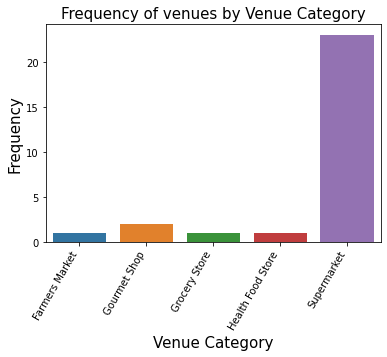

<Figure size 1440x432 with 0 Axes>

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.barplot(x='Venue Category',y='Total',data=Milan_venues_frequency)
a.set_xticklabels(a.get_xticklabels(), rotation=60, horizontalalignment='right')

plt.title('Frequency of venues by Venue Category', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
fig = plt.figure(figsize=(20,6))
plt.show()

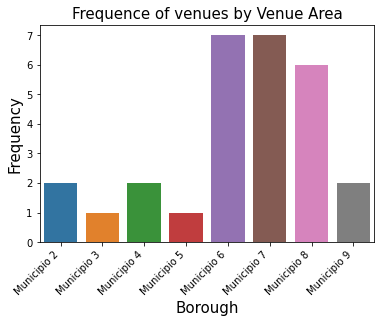

<Figure size 2880x1080 with 0 Axes>

In [54]:
#distribution of venues by Borough
Milan_venues_byarea = Milan_venues_all[['Borough','Venue']].rename(columns={'Venue':'Frequency'}).groupby('Borough').count().reset_index()

b = sns.barplot(x='Borough', y='Frequency', data= Milan_venues_byarea)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Frequence of venues by Venue Area', fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
fig = plt.figure(figsize=(40,15))
plt.show()

In [55]:
#Create a dataframe with all the venues in centro storico
Milan_venues_Municipio1 = Milan_venues[Milan_venues['Borough'].str.contains('Municipio 1 - Centro storico')].reset_index()

#group by venue category
Milan_venues_Municipio1[['Venue Category','index']].groupby('Venue Category').count().reset_index()

,Venue Category,index
0,Accessories Store,1
1,Argentinian Restaurant,1
2,Art Gallery,3
3,Art Museum,2
4,Bakery,4
5,Bar,1
6,Bistro,1
7,Bookstore,1
8,Boutique,7
9,Café,3


In [57]:
#create a folium map with all the venues
 
map_venues_all = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(Milan_venues_all['Venue Latitude'], Milan_venues_all['Venue Longitude'], Milan_venues_all['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup= label,
        icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(map_venues_all) 
    
map_venues_all

In [60]:
#O venues exist in Borough 1, so I add 0 to the total number of venues for this Borough
Milan_venues_byarea_all = Milan_venues_byarea['Frequency'].tolist()

Milan_venues_byarea_all = np.insert(Milan_venues_byarea_all,0,0)

Milan_venues_byarea_all = pd.DataFrame(Milan_venues_byarea_all, columns = ['venues'])

Milan_venues_byarea_all

,venues
0,0
1,2
2,1
3,2
4,1
5,7
6,7
7,6
8,2


In [64]:
#add the total Nr. of venues in each Borough to the df3 dataframe
df3['Total Nr. of Venues']= Milan_venues_byarea_all

In [65]:
df3.head()

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts),Municipio,Indirizzo,Civico,CAP,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location,Total Nr. of Venues
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua...",Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)",0
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma...",Municipio 2,Viale Zara,100,20125,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)",2
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra...",Municipio 3,Via Sansovino,9,20133,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)",1
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ...",Municipio 4,Via Oglio,18,20139,35,LODI - CORVETTO,9.217800,45.440367,"(45.4403671711589, 9.21780038417137)",2
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ...",Municipio 5,Viale Tibaldi,41,20136,6,PORTA TICINESE - CONCA DEL NAVIGLIO,9.183194,45.444604,"(45.444604431264, 9.18319353884224)",1


In [70]:
#calculate the score of each Borough as the ration between its population and the total number of venues
#add the score as a column to the df3 dataframe
df3['Borough score'] = df3['Population(2014)']/df3['Total Nr. of Venues']

In [71]:
df3

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts),Municipio,Indirizzo,Civico,CAP,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location,Total Nr. of Venues,Borough score
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua...",Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)",0,inf
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma...",Municipio 2,Viale Zara,100,20125,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)",2,7.655450e+04
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra...",Municipio 3,Via Sansovino,9,20133,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)",1,1.412290e+05
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ...",Municipio 4,Via Oglio,18,20139,35,LODI - CORVETTO,9.217800,45.440367,"(45.4403671711589, 9.21780038417137)",2,7.818450e+04
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ...",Municipio 5,Viale Tibaldi,41,20136,6,PORTA TICINESE - CONCA DEL NAVIGLIO,9.183194,45.444604,"(45.444604431264, 9.18319353884224)",1,1.237790e+05
5,6.0,"Barona, Lorenteggio",18.28,149000.0,8998,"Arzaga, Barona, Boffalora, Cascina Bianca, Con...",Municipio 6,Viale Legioni Romane,54,20147,56,FORZE ARMATE,9.127671,45.459587,"(45.4595868109128, 9.12767089895275)",7,2.128571e+04
6,7.0,"Baggio, De Angeli, San Siro",31.34,170814.0,6093,"Assiano, Baggio, Figino, Fopponino, Forze Arma...",Municipio 7,Via Anselmo da Baggio,55,20153,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,9.088685,45.463432,"(45.4634318317571, 9.08868519510992)",7,2.440200e+04
7,8.0,"Fiera, Gallaratese, Quarto Oggiaro",23.72,181669.0,8326,"Boldinasco, Bullona, Cagnola, Campo dei Fiori,...",Municipio 8,Via Quarenghi,21,20151,65,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,9.115104,45.496472,"(45.496472318274, 9.11510409784692)",6,3.027817e+04
8,9.0,"Porta Garibaldi, Niguarda",21.12,181598.0,9204,"Affori, Bicocca, Bovisa, Bovisasca, Bruzzano, ...",Municipio 9,Via Guerzoni,38,20158,79,DERGANO,9.175739,45.500140,"(45.5001399883657, 9.17573905361164)",2,9.079900e+04


In [76]:
df_score = df3[['Municipio','Borough score']]

df_score.sort_values(by=['Borough score'],ascending = False)

,Municipio,Borough score
0,Municipio 1 - Centro storico,inf
2,Municipio 3,1.412290e+05
4,Municipio 5,1.237790e+05
8,Municipio 9,9.079900e+04
3,Municipio 4,7.818450e+04
1,Municipio 2,7.655450e+04
7,Municipio 8,3.027817e+04
6,Municipio 7,2.440200e+04
5,Municipio 6,2.128571e+04


### Clustering Neighborhoods with K-Means

In [77]:
from sklearn.cluster import KMeans

In [78]:
#apply one hot encoding to the dataframe

Milan_encoding = pd.get_dummies(Milan_venues_all[['Venue Category']], prefix="", prefix_sep="")

In [79]:
# add a column with the neighborhood to the dataframe
Milan_encoding['Borough'] = Milan_venues_all['Borough'] 

Milan_encoding.head()

,Farmers Market,Gourmet Shop,Grocery Store,Health Food Store,Supermarket,Borough
0,0,0,0,0,1,Municipio 2
1,0,0,0,0,1,Municipio 3
3,0,0,0,0,1,Municipio 4
4,0,0,0,0,1,Municipio 6
5,0,0,0,0,1,Municipio 6


In [81]:
#frequency for each Borough

Milan_freq = Milan_encoding.groupby('Borough').mean().reset_index()

Milan_freq

,Borough,Farmers Market,Gourmet Shop,Grocery Store,Health Food Store,Supermarket
0,Municipio 2,0.0,0.5,0.0,0.000000,0.500000
1,Municipio 3,0.0,0.0,0.0,0.000000,1.000000
2,Municipio 4,0.5,0.0,0.0,0.000000,0.500000
3,Municipio 5,0.0,1.0,0.0,0.000000,0.000000
4,Municipio 6,0.0,0.0,0.0,0.142857,0.857143
5,Municipio 7,0.0,0.0,0.0,0.000000,1.000000
6,Municipio 8,0.0,0.0,0.0,0.000000,1.000000
7,Municipio 9,0.0,0.0,0.5,0.000000,0.500000


In [82]:
# Set the number of clusters equal to 3

kclusters = 3

Milan_freq_clustering = Milan_freq.drop('Borough', 1)

# Run the K-Means clustering algorithm
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Milan_freq_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 2, 1, 1, 1, 0])

#### Cluster 0 (Municipio 2, Municipio 4, Municipio 9): 50% of venues are Supermarkets
#### Cluster 1 (Municipio 3, Municipio 6, Municipio 7, Municipio 8): Over are 50% of venues aren Supermarkets
#### Cluster 2 (Municipio 5): There are no Supermarkets
#### Cluster 3 (added cluster - Municipio 1): There are no food store venues 

In [83]:
clusters = kmeans.labels_

clusters

array([0, 1, 0, 2, 1, 1, 1, 0])

In [84]:
#create a cluster for Municipio 1

clusters = np.insert(clusters, 0, 3)

clusters

array([3, 0, 1, 0, 2, 1, 1, 1, 0])

In [85]:
#convert the clusters array to a dataframe
Clusters = pd.DataFrame(clusters, columns = ['Clusters'])

Clusters

,Clusters
0,3
1,0
2,1
3,0
4,2
5,1
6,1
7,1
8,0


In [86]:
#add cluster labels to the dataframe

df3 = df3.join(Clusters)

In [87]:
df3

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts),Municipio,Indirizzo,Civico,CAP,ID_NIL,NIL,LONG_X_4326,LAT_Y_4326,Location,Total Nr. of Venues,Borough score,Clusters
0,1.0,Centro storico,9.67,96315.0,11074,"Brera, Centro Storico, Conca del Naviglio, Gua...",Municipio 1 - Centro storico,Via Guglielmo Marconi,2,20123,1,DUOMO,9.189857,45.463365,"(45.4633646580698, 9.18985741768964)",0,inf,3
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma...",Municipio 2,Viale Zara,100,20125,12,MACIACHINI - MAGGIOLINA,9.195895,45.497279,"(45.497278789517, 9.19589480157642)",2,7.655450e+04,0
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra...",Municipio 3,Via Sansovino,9,20133,21,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,9.218574,45.479225,"(45.4792249782667, 9.21857390729287)",1,1.412290e+05,1
3,4.0,"Porta Vittoria, Forlanini",20.95,156369.0,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ...",Municipio 4,Via Oglio,18,20139,35,LODI - CORVETTO,9.217800,45.440367,"(45.4403671711589, 9.21780038417137)",2,7.818450e+04,0
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ...",Municipio 5,Viale Tibaldi,41,20136,6,PORTA TICINESE - CONCA DEL NAVIGLIO,9.183194,45.444604,"(45.444604431264, 9.18319353884224)",1,1.237790e+05,2
5,6.0,"Barona, Lorenteggio",18.28,149000.0,8998,"Arzaga, Barona, Boffalora, Cascina Bianca, Con...",Municipio 6,Viale Legioni Romane,54,20147,56,FORZE ARMATE,9.127671,45.459587,"(45.4595868109128, 9.12767089895275)",7,2.128571e+04,1
6,7.0,"Baggio, De Angeli, San Siro",31.34,170814.0,6093,"Assiano, Baggio, Figino, Fopponino, Forze Arma...",Municipio 7,Via Anselmo da Baggio,55,20153,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,9.088685,45.463432,"(45.4634318317571, 9.08868519510992)",7,2.440200e+04,1
7,8.0,"Fiera, Gallaratese, Quarto Oggiaro",23.72,181669.0,8326,"Boldinasco, Bullona, Cagnola, Campo dei Fiori,...",Municipio 8,Via Quarenghi,21,20151,65,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,9.115104,45.496472,"(45.496472318274, 9.11510409784692)",6,3.027817e+04,1
8,9.0,"Porta Garibaldi, Niguarda",21.12,181598.0,9204,"Affori, Bicocca, Bovisa, Bovisasca, Bruzzano, ...",Municipio 9,Via Guerzoni,38,20158,79,DERGANO,9.175739,45.500140,"(45.5001399883657, 9.17573905361164)",2,9.079900e+04,0


In [88]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters + 1)
ys = [i + x + (i*x)**2 for i in range(kclusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df3['LAT_Y_4326'], df3['LONG_X_4326'], df3['Borough'], df3['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters